In [1]:
from mpcsimplified import *

In [2]:
total_time = 100
t_step = 1
steps = int(total_time/t_step)


In [3]:
setup_mpc = {
    'n_robust': 1,
    'n_horizon': 5,
    't_step': t_step,
    'store_full_solution': True
}

model = template_model(False)
mpc = template_mpc(model, setup_mpc)
simulator = template_simulator(model, t_step)
estimator = do_mpc.estimator.StateFeedback(model)


In [4]:
%%capture

x_0 = np.array([20.68, 2.11])

mpc.x0 = x_0
simulator.x0 = x_0
estimator.x0 = x_0

mpc.set_initial_guess()

for k in range(steps):
    u = mpc.make_step(x_0)

    y_next = simulator.make_step(u)
    x_0 = estimator.make_step(y_next)

data = save_results(mpc)


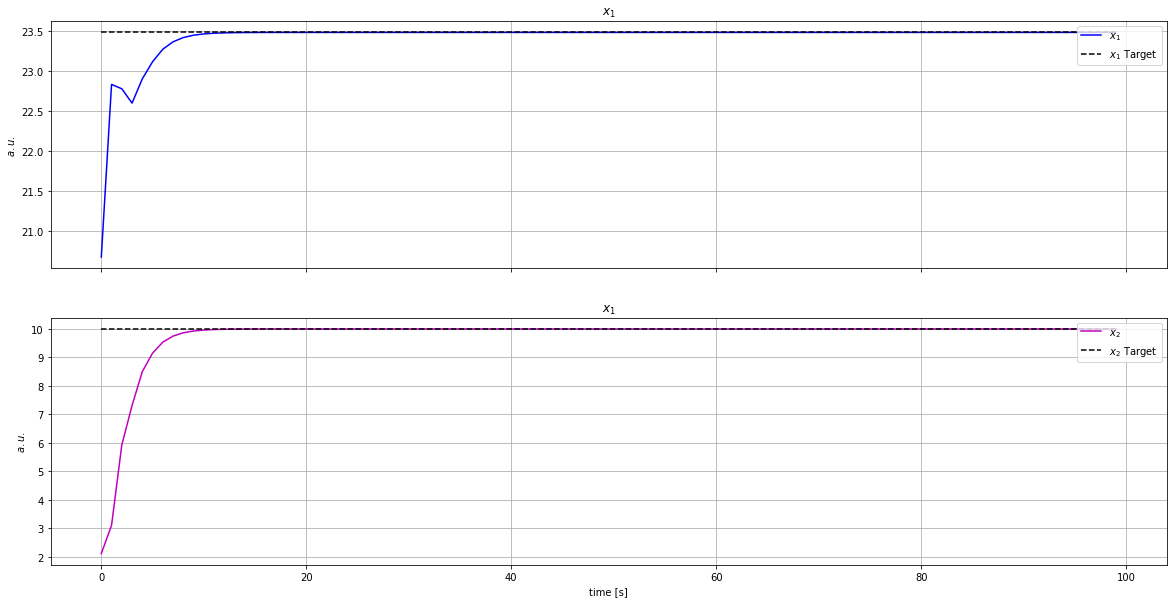

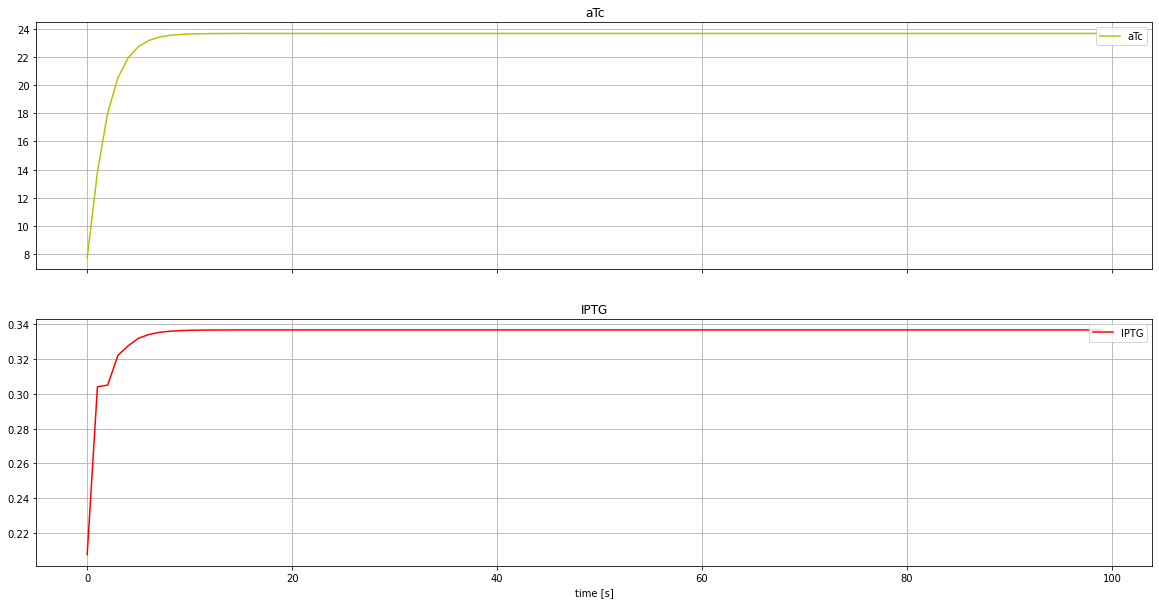

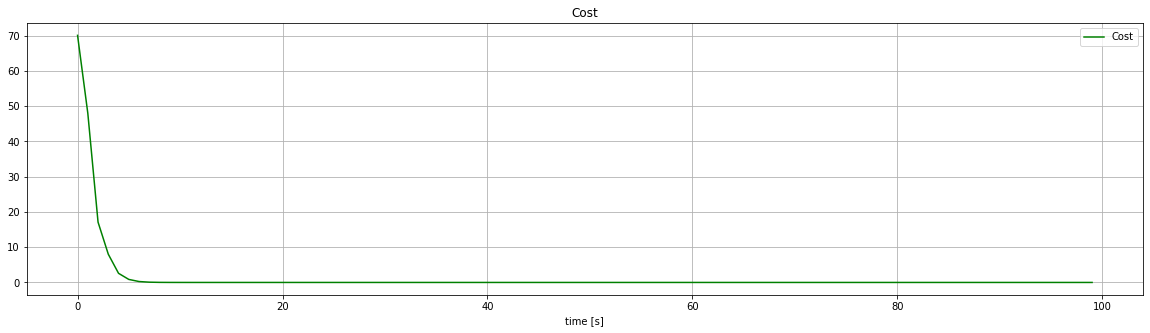

In [5]:
plot_results(data)